In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sys import exit


In [44]:
timax = 200
c = np.loadtxt("data/c_0.dat").T
drops = np.loadtxt("data/drops_0.dat")

Lx = 50
Ly = 25
Nx = 200
Ny = 100

dx = Lx / Nx
dy = Ly / Ny
aspect = dy / dx

cmax = 0.0
cmin = 1.0
for ti in range(timax):
        
    c = np.loadtxt("data/c_" + str( ti) + ".dat").T

    m = np.min(c)
    if m < cmin:
        cmin = m
    m = np.max(c)
    if m > cmax:
        cmax = m


0
0
50
100
150
0


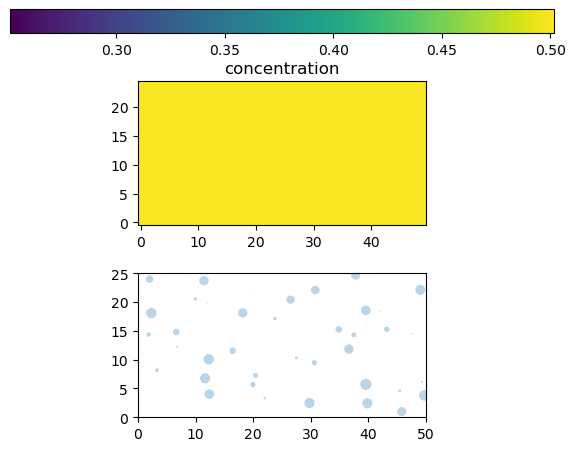

In [45]:


fig = plt.figure()

ax1  = fig.add_axes([0.1, 0.075, 0.85, 0.3])
ax0  = fig.add_axes([0.1, 0.475, 0.85, 0.3])
axcb = fig.add_axes([0.1, 0.875, 0.85, 0.05])


ax = ax0
im = ax.imshow(c, vmin= cmin, vmax=cmax, interpolation='none', origin='lower')
ax.set_title("concentration")
fig.colorbar(im, cax=axcb, orientation='horizontal')


ax.set_aspect(aspect)

ax = ax1
ax.set_title("Droplets")

ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.set_aspect(1)


def init():
    return update_frame(0)

def update_frame(ti):
    if ti % 50 == 0: print(ti)
        
    c = np.loadtxt("data/c_" + str( ti) + ".dat").T
    drops = np.loadtxt("data/drops_" + str(ti) + ".dat")
    
    im.set_data(c)
    #fig.colorbar(im, cax=axcb, orientation='horizontal')

    ax = ax1
    ax.clear()
    ax.set_xlim([0,Lx])
    ax.set_ylim([0,Ly])
    ax.set_aspect(1)
    
    for i in range(drops.shape[0]):
        x = drops[i][0]
        y = drops[i][1]
        R = drops[i][2]

        if R > 0:
            #print(x,y,R)
            circle = plt.Circle((x, y), R) 
            circle.set_alpha(0.3) 
            ax.add_artist(circle)
    return im,

anim = animation.FuncAnimation(fig, update_frame, init_func=init, frames=timax)
anim.save("droplets_movie2.mp4")
#plt.show()#



